# Project Title - Test of Perceptual Phenomena (Stroop Effect) - Analysis

This project will investigate a classic phenomenon from experimental psychology called the Stroop Effect. The project is aimed at creating hypothesis regarding the outcome of the task, then go through the task . Then inspecting the data, compute statistics describing the task and interpret the results in terms of the hypothesis.


## What is stroop effect?
In a Stroop task, participants are presented with a list of words, with each word displayed in a color of ink. The participant’s task is to say out loud the color of the ink in which the word is printed. The task has two conditions: a congruent words condition, and an incongruent words condition. In the congruent words condition, the words being displayed are color words whose names match the colors in which they are printed: for example RED, BLUE. In the incongruent words condition, the words displayed are color words whose names do not match the colors in which they are printed: for example PURPLE, ORANGE. In each case, the time it takes to name the ink colors in equally-sized lists is measured. Each participant will go through and record a time from each condition.

### 1) What is our independent variable? What is our dependent variable?

Independent variable - Independent variable is the congruency of the colour and text. Based on the information about stroop effect independent variables are the words and thier colors which are presented to the particpants. The congruent word conditon and incongruent word conditon is the independent varible.

Dependent Variable - Dependent variable, Duration (time) to recognise the colours or the texts. 

### 2)  What is an appropriate set of hypotheses for this task?
The reading tests are performed on the same set of people for two different conditions. Hence it is appropriate to choose a dependent t-test for paired samples with the following assumptions.

The sample is randomly choosen.
The sample of differences is almost normal.
Samples are dependent and can be paired .
Both samples are of equal size.

Below is the hypothesis for the t-test

Null Hypothesis - There is no time difference in identifying the ink colors in both congurent word conditon and incongurent word condition.

Alternate Hypothesis - There is a time difference in identifying the ink colors in congurnet word conditon and incongurent word condition.


$$H_0: \mu_{c} - \mu_{i} = 0$$


$$H_0: \mu_{c} - \mu_{i} \neq 0$$


**$\mu_{c}$ and $\mu_{i}$ are the population mean values for time taken to identify congruent and incongruent words respectivley.**

#### Justification :
A two-tailed test is appropriate if you want to determine if there is any difference between the groups you are comparing. Here we are taking two types of test on the same sample and we don't have population parameters available and because both the tests are taken by the same sample, this is an dependent t-test.

For instance, if you want to see if Group A scored higher or lower than Group B, then you would want to use a two-tailed test. This is because a two-tailed test uses both the positive and negative tails of the distribution. In other words, it tests for the possibility of positive or negative differences.


### 3) Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability.



In [65]:
# Load all the necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats
import math
import random

In [66]:
# Load stroop data into dataframe

df = pd.read_csv('stroopdata.csv')

In [67]:
# Display a few lines from the dataset to analyze

df.head(10)

,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687
4,14.669,22.803
5,12.238,20.878
6,14.692,24.572
7,8.987,17.394
8,9.401,20.762
9,14.480,26.282


In [68]:
# Learn about the datatypes , columns names and size of the data available
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
Congruent      24 non-null float64
Incongruent    24 non-null float64
dtypes: float64(2)
memory usage: 464.0 bytes


In [69]:
# Quick statictical analysis 
df.describe()

,Congruent,Incongruent
count,24.000000,24.000000
mean,14.051125,22.015917
std,3.559358,4.797057
min,8.630000,15.687000
25%,11.895250,18.716750
50%,14.356500,21.017500
75%,16.200750,24.051500
max,22.328000,35.255000


In [6]:
# Median
df.median()

Congruent      14.3565
Incongruent    21.0175
dtype: float64

#### Measure Central of tendancy :
Here we use median as a measure of central tendency. 

In [7]:
# Variance
df.var()

Congruent      12.669029
Incongruent    23.011757
dtype: float64

In [8]:
# Standard Deviation
df.std()

Congruent      3.559358
Incongruent    4.797057
dtype: float64

#### Measure of variability :
Here we use standard deviation and vaiance as a measure of variability

### 4) Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

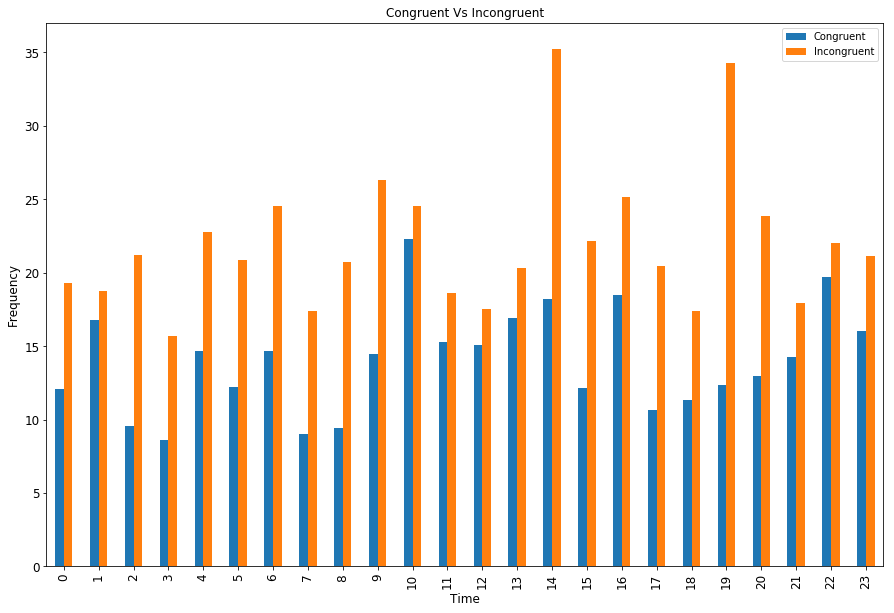

In [70]:
#df.plot(kind='bar')
ax = df.plot(kind='bar', title ="Congruent Vs Incongruent", figsize=(15, 10), legend=True, fontsize=12)
ax.set_xlabel("Time", fontsize=12)
ax.set_ylabel("Frequency", fontsize=12)
plt.show()

From the above graph it can be observed the Congruent time is always less than the incongruent time. Which suggest it takes longer time to identify the ink colors of incongruent words when compred to congruent words.

Text(0.5,1,'KDE of Stroop effect')

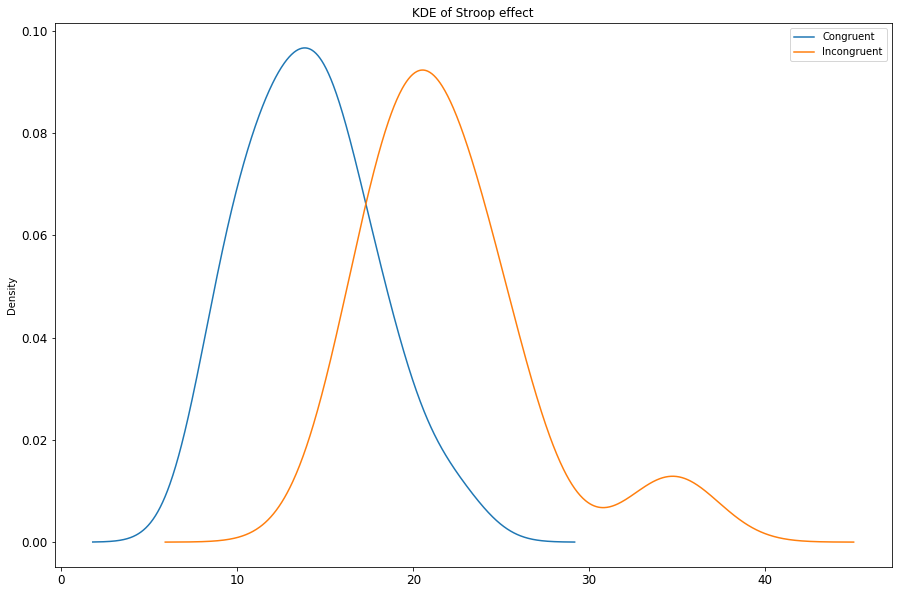

In [71]:
df.plot.kde(figsize=(15, 10), legend=True, fontsize=12)
plt.title('KDE of Stroop effect')



To better understand the histogram we plot a density plot (a density is a smoothed, continuous version 
of a histogram estimated from the data). Fromt eh above plo we can see both the Congruent and Incongruent data are normally distributed.

### 5) Perform the statistical test and report your results. What is your confidence level or Type I error associated with your test? What is your conclusion regarding the hypotheses you set up? Did the results match up with your expectations? 

In [72]:
# mean of congruent and incngruent test
mean_cong = df['Congruent'].mean()
mean_incong = df['Incongruent'].mean()
mean_cong,mean_incong

(14.051125000000004, 22.01591666666667)

In [73]:
# Determine point estiamte
point_estimate = mean_cong - mean_incong
point_estimate

-7.964791666666665

In [74]:
# Square of sums of sample difference means
sq_sums = sum(((df['Congruent'] - df['Incongruent']) - point_estimate) ** 2)
sq_sums

544.3304399583335

In [75]:
# Variance of diffenence
variance_diff = sq_sums / (24 -1)
variance_diff

23.666540867753632

In [76]:
# Standard deviation of difference
std_diff = variance_diff ** (1/2)
std_diff

4.864826910359056

In [77]:
## Calculate the t-value
st = point_estimate /( std_diff / ( 24 ** (1/2) ) )
st

-8.020706944109955

In [78]:
# degrees of freedom

deg_freedom =( 24 - 1)
deg_freedom

23

In [79]:
# Calculate pvalue
pvalue =stats.t.cdf(x = st, df = deg_freedom ) * 2 
pvalue

4.103000585711186e-08

In [80]:
#Calculate t-critical assuming alpha level 0.005 (aiming to 99% confidence level)
alpha = 0.005
tcritical = stats.t.ppf(q=alpha, df=23)
tcritical

-2.8073356837675236

In [81]:
## Single step pvalue and tvalue calculation
stats.ttest_rel(df['Congruent'], df['Incongruent'])

Ttest_relResult(statistic=-8.020706944109957, pvalue=4.103000585711178e-08)

### Conclusion :
 The t-value is less than the t-critical and also the p-value is 4.1030e-08 which is very close to 0 hence we reject the Null Hypothesis. This implies the incongruent ink colors does take more time for identification when compared to the congruent words.
 The results matchs up to the expection that there is s time difference between congruent and inongruent word ink color identification and the above statictics proves it true.



### Optional: 
What do you think is responsible for the effects observed? 

The words themselves have a strong influence over your ability to say the color. The interference between the different information (what the words say and the color of the words) your brain receives causes a problem. There are two theories that may explain the Stroop effect:

Speed of Processing Theory: the interference occurs because words are read faster than colors are named.
Selective Attention Theory: the interference occurs because naming colors requires more attention than reading words.


Can you think of an alternative or similar task that would result in a similar effect? 
Turn the words upside down or rotate them 90 degrees.
Turn the words "inside out."
Use non-color words such as "dog" or "house."
Use nonsense words such as "kiw" or "thoz."
Compare long words to short words.
Use emotional words such as "sad" or "happy" or "depressed" or "angry."
Color only half of the word or color only the first and last letter of each word.

### References :
http://www.statisticssolutions.com/should-you-use-a-one-tailed-test-or-a-two-tailed-test-for-your-data-analysis/

http://www.statisticshowto.com/probability-and-statistics/t-test/#PairedTTest

https://towardsdatascience.com/inferential-statistics-series-t-test-using-numpy-2718f8f9bf2f

https://faculty.washington.edu/chudler/words.html#seffect